In [ ]:
!pip install kaggle


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3431.jpg', 'with_mask_3188.jpg', 'with_mask_970.jpg', 'with_mask_791.jpg', 'with_mask_1840.jpg']
['with_mask_281.jpg', 'with_mask_2278.jpg', 'with_mask_3301.jpg', 'with_mask_2285.jpg', 'with_mask_771.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1070.jpg', 'without_mask_3316.jpg', 'without_mask_3030.jpg', 'without_mask_3144.jpg', 'without_mask_1773.jpg']
['without_mask_1309.jpg', 'without_mask_416.jpg', 'without_mask_2195.jpg', 'without_mask_2158.jpg', 'without_mask_873.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


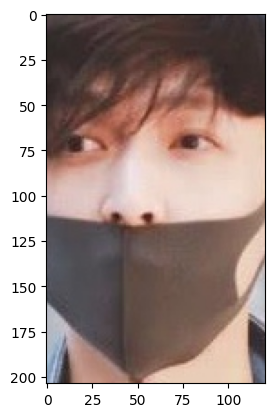

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

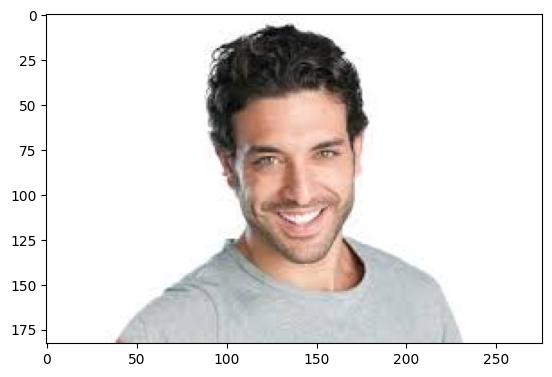

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[175, 152, 138],
        [174, 151, 137],
        [175, 152, 138],
        ...,
        [148, 126, 105],
        [147, 125, 104],
        [148, 126, 105]],

       [[174, 151, 137],
        [174, 151, 137],
        [175, 152, 138],
        ...,
        [149, 127, 106],
        [149, 127, 106],
        [147, 125, 104]],

       [[176, 153, 139],
        [175, 152, 138],
        [175, 152, 138],
        ...,
        [149, 127, 106],
        [149, 127, 106],
        [148, 126, 105]],

       ...,

       [[142, 106,  87],
        [145, 114,  97],
        [152, 123, 103],
        ...,
        [151, 128, 108],
        [149, 127, 107],
        [149, 126, 107]],

       [[139, 107,  87],
        [144, 117,  98],
        [151, 124, 103],
        ...,
        [151, 128, 109],
        [151, 128, 109],
        [149, 126, 111]],

       [[139, 106,  87],
        [145, 115,  95],
        [151, 122, 101],
        ...,
        [151, 128, 112],
        [149, 126, 110],
        [148, 125, 109]]], dtype=uint8)
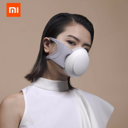

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 50,  72,  23],
        [ 42,  63,  19],
        [ 45,  62,  26],
        ...,
        [180, 165, 145],
        [213, 204, 165],
        [195, 191, 140]],

       [[ 49,  74,  29],
        [ 41,  63,  20],
        [ 45,  65,  26],
        ...,
        [161, 150, 124],
        [245, 242, 193],
        [238, 238, 175]],

       [[ 39,  66,  32],
        [ 42,  67,  28],
        [ 44,  66,  25],
        ...,
        [146, 139, 104],
        [220, 220, 159],
        [195, 200, 120]],

       ...,

       [[206, 223, 110],
        [222, 238, 128],
        [198, 220, 114],
        ...,
        [208, 168, 134],
        [200, 162, 119],
        [195, 159, 108]],

       [[223, 238, 125],
        [208, 226, 116],
        [206, 231, 125],
        ...,
        [229, 181, 139],
        [233, 185, 135],
        [221, 172, 116]],

       [[242, 253, 143],
        [211, 228, 120],
        [200, 226, 122],
        ...,
        [239, 192, 148],
        [249, 202, 149],
        [248, 205, 146]]], dtype=uint8)
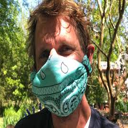

In [34]:
X_train[0]

In [35]:
X_train_scaled[0]

array([[[0.19607843, 0.28235294, 0.09019608],
        [0.16470588, 0.24705882, 0.0745098 ],
        [0.17647059, 0.24313725, 0.10196078],
        ...,
        [0.70588235, 0.64705882, 0.56862745],
        [0.83529412, 0.8       , 0.64705882],
        [0.76470588, 0.74901961, 0.54901961]],

       [[0.19215686, 0.29019608, 0.11372549],
        [0.16078431, 0.24705882, 0.07843137],
        [0.17647059, 0.25490196, 0.10196078],
        ...,
        [0.63137255, 0.58823529, 0.48627451],
        [0.96078431, 0.94901961, 0.75686275],
        [0.93333333, 0.93333333, 0.68627451]],

       [[0.15294118, 0.25882353, 0.1254902 ],
        [0.16470588, 0.2627451 , 0.10980392],
        [0.17254902, 0.25882353, 0.09803922],
        ...,
        [0.57254902, 0.54509804, 0.40784314],
        [0.8627451 , 0.8627451 , 0.62352941],
        [0.76470588, 0.78431373, 0.47058824]],

       ...,

       [[0.80784314, 0.8745098 , 0.43137255],
        [0.87058824, 0.93333333, 0.50196078],
        [0.77647059, 0

**Building a Convolutional Neural Networks (CNN)**

In [54]:
!pip install tensorflow opencv-python matplotlib

In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import os


In [56]:
# Set dataset path
dataset_path = "/content/data"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [57]:
# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

In [58]:
# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [59]:
# Load MobileNetV2 base model
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

<ipython-input-59-4c970ec5defb>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

In [61]:
# Build custom head
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(128, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(2, activation="softmax")(head_model)


In [62]:
# Combine base and head
model = Model(inputs=base_model.input, outputs=head_model)

In [63]:
# Compile model
optimizer = Adam(learning_rate=1e-4)
model.compile(
    loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [66]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=20
)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 91s 486ms/step - accuracy: 0.9754 - loss: 0.0887 - val_accuracy: 0.9727 - val_loss: 0.0744
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 1.0000 - loss: 0.0380 - val_accuracy: 0.9774 - val_loss: 0.0737
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 756ms/step - accuracy: 0.9786 - loss: 0.0681 - val_accuracy: 0.9774 - val_loss: 0.0682
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9062 - loss: 0.1357 - val_accuracy: 0.9774 - val_loss: 0.0702
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 753ms/step - accuracy: 0.9782 - loss: 0.0643 - val_accuracy: 0.9840 - val_loss: 0.0551
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.9781 - val_loss: 0.0689
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 765ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9807 - val_loss: 0.0559
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 1.0000 - loss: 0

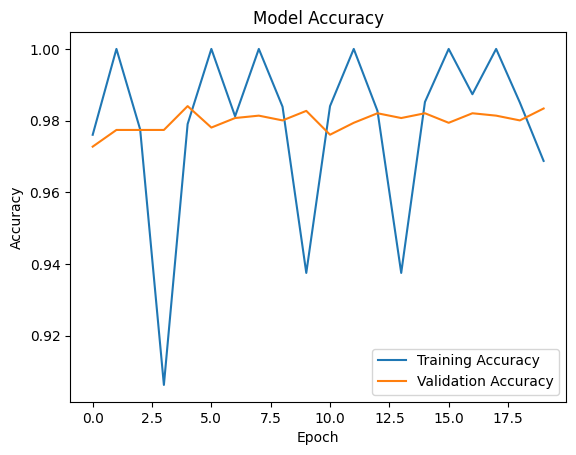

In [67]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [68]:
# Save model
model.save("face_mask_detector.h5")


In [79]:
# Function to detect mask in an image
def detect_mask(image):
    # Preprocess image
    resized = cv2.resize(image, IMG_SIZE)
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, IMG_SIZE[0], IMG_SIZE[1], 3))

    # Predict
    prediction = model.predict(reshaped)
    label = "Mask" if prediction[0][0] > prediction[0][1] else "No Mask"
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

    # Add label to image
    cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    return image, prediction


In [81]:
from google.colab import files
from google.colab.patches import cv2_imshow

Saving woman-wearing-mask.original.jpg to woman-wearing-mask.original (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Face detected in woman-wearing-mask.original (1).jpg:
Mask probability: 1.0000
No Mask probability: 0.0000


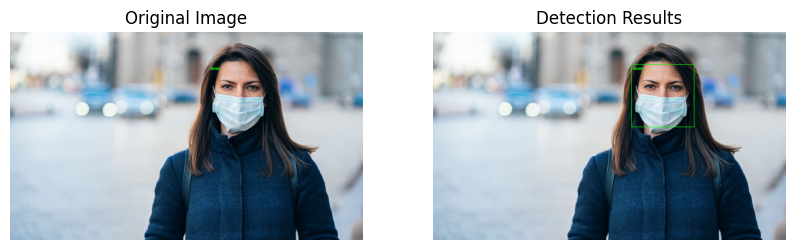

In [85]:
# Function to test on uploaded images
def test_on_images():
    # Upload images
    uploaded = files.upload()

    # Load face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for filename in uploaded.keys():
        # Read image
        image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        output_image = image.copy()

        # Detect faces
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            detected_face, prediction = detect_mask(face)
            output_image[y:y+h, x:x+w] = detected_face
            cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Print prediction probabilities
            print(f"Face detected in {filename}:")
            print(f"Mask probability: {prediction[0][0]:.4f}")
            print(f"No Mask probability: {prediction[0][1]:.4f}")

        # Display results
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output_image)
        plt.title("Detection Results")
        plt.axis('off')

        plt.show()

# Test the model on uploaded images
test_on_images()

Saving testing_img_1.jpeg to testing_img_1 (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Face detected in testing_img_1 (2).jpeg:
Mask probability: 0.0000
No Mask probability: 1.0000


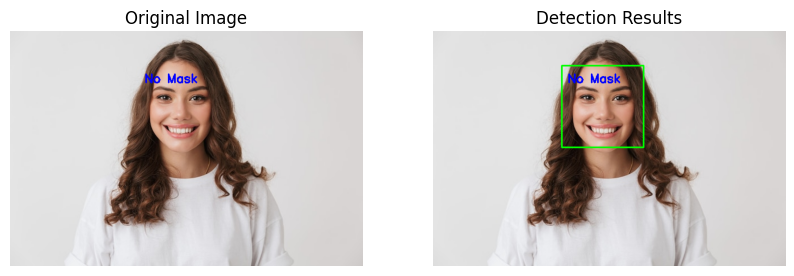

In [86]:
# Function to test on uploaded images
def test_on_images():
    # Upload images
    uploaded = files.upload()

    # Load face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for filename in uploaded.keys():
        # Read image
        image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        output_image = image.copy()

        # Detect faces
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            detected_face, prediction = detect_mask(face)
            output_image[y:y+h, x:x+w] = detected_face
            cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Print prediction probabilities
            print(f"Face detected in {filename}:")
            print(f"Mask probability: {prediction[0][0]:.4f}")
            print(f"No Mask probability: {prediction[0][1]:.4f}")

        # Display results
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output_image)
        plt.title("Detection Results")
        plt.axis('off')

        plt.show()

# Test the model on uploaded images
test_on_images()